In [5]:
import pandas as pd
df_ = pd.read_csv("crop_price.csv")
df_ = df_.loc[:, ~df_.columns.str.contains('^Unnamed')]
print(df_.isnull().sum())
df_.head(10)


State       0
Capital     0
Year        0
Month       0
Rainfall    0
Crop        0
Price       0
dtype: int64


,State,Capital,Year,Month,Rainfall,Crop,Price
0,Rajasthan,Jaipur,2004,1,1.8,Wheat,94.8
1,Rajasthan,Jaipur,2004,2,3.6,Wheat,95.0
2,Rajasthan,Jaipur,2004,3,13.6,Wheat,95.6
3,Rajasthan,Jaipur,2004,4,13.9,Wheat,95.4
4,Rajasthan,Jaipur,2004,5,16.0,Wheat,98.4
5,Rajasthan,Jaipur,2004,6,148.4,Wheat,98.8
6,Rajasthan,Jaipur,2004,7,226.4,Wheat,99.0
7,Rajasthan,Jaipur,2004,8,22.1,Wheat,121.7
8,Rajasthan,Jaipur,2004,9,139.7,Wheat,101.1
9,Rajasthan,Jaipur,2004,10,0.0,Wheat,100.8


In [6]:
df_.describe(include='all')

,State,Capital,Year,Month,Rainfall,Crop,Price
count,84,84,84.000000,84.000000,84.000000,84,84.000000
unique,1,1,NaN,NaN,NaN,1,NaN
top,Rajasthan,Jaipur,NaN,NaN,NaN,Wheat,NaN
freq,84,84,NaN,NaN,NaN,84,NaN
mean,NaN,NaN,2007.000000,6.500000,42.240476,NaN,135.591667
std,NaN,NaN,2.012012,3.472786,69.175504,NaN,26.690534
min,NaN,NaN,2004.000000,1.000000,0.000000,NaN,94.800000
25%,NaN,NaN,2005.000000,3.750000,0.200000,NaN,113.700000
50%,NaN,NaN,2007.000000,6.500000,3.850000,NaN,136.450000
75%,NaN,NaN,2009.000000,9.250000,39.175000,NaN,157.625000


In [60]:
df_.shape

(84, 7)

In [61]:
df_.dtypes

State        object
Capital      object
Year          int64
Month         int64
Rainfall    float64
Crop         object
Price       float64
dtype: object

In [62]:
print(df_.columns)

Index(['State', 'Capital', 'Year', 'Month', 'Rainfall', 'Crop', 'Price'], dtype='object')


In [63]:
if 'Crop' in df_.columns:
    df_ = df_.drop('Crop', axis=1)

In [7]:
df_=pd.get_dummies(df_)
# Convert all boolean columns to integers (1 for True, 0 for False)
df_ = df_.astype(int)

# Check the result
df_.head()

,Year,Month,Rainfall,Price,State_Rajasthan,Capital_ Jaipur,Crop_Wheat
0,2004,1,1,94,1,1,1
1,2004,2,3,95,1,1,1
2,2004,3,13,95,1,1,1
3,2004,4,13,95,1,1,1
4,2004,5,16,98,1,1,1


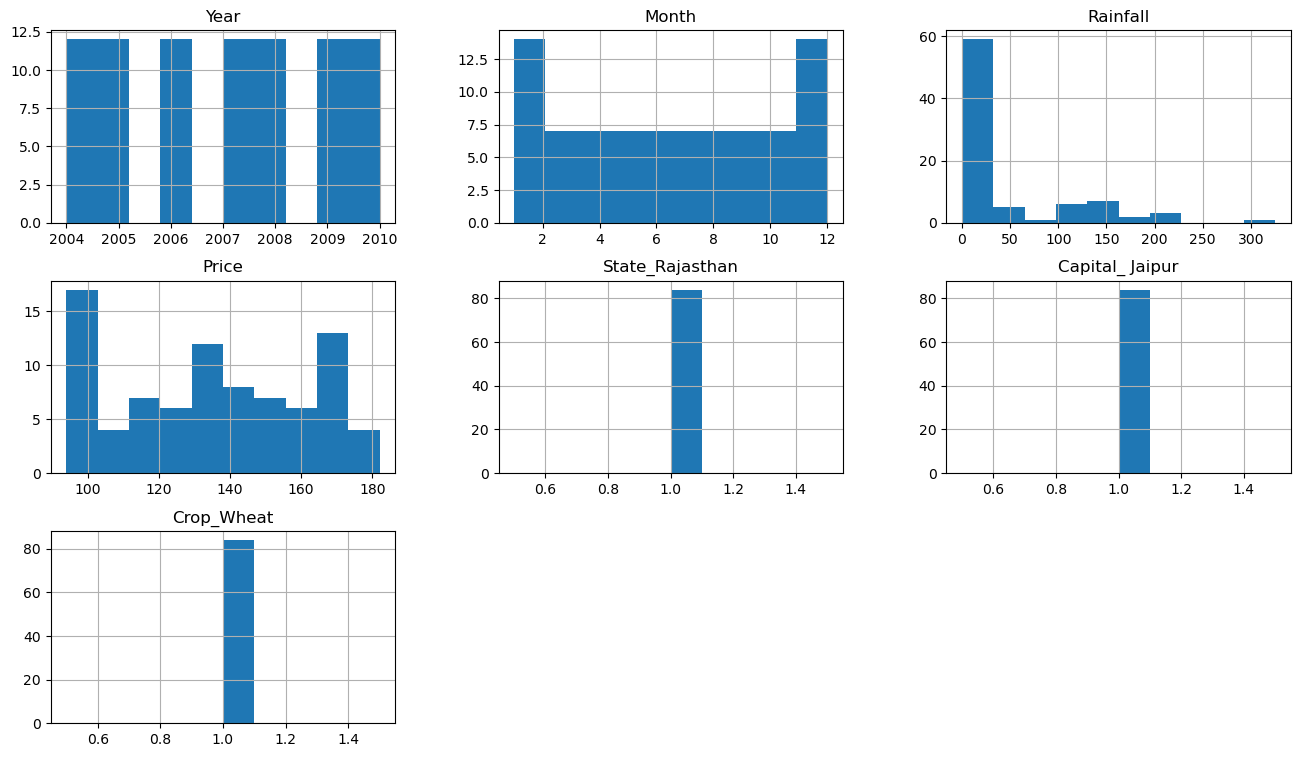

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=[16,9]

df_.hist()
plt.show()

<Axes: >

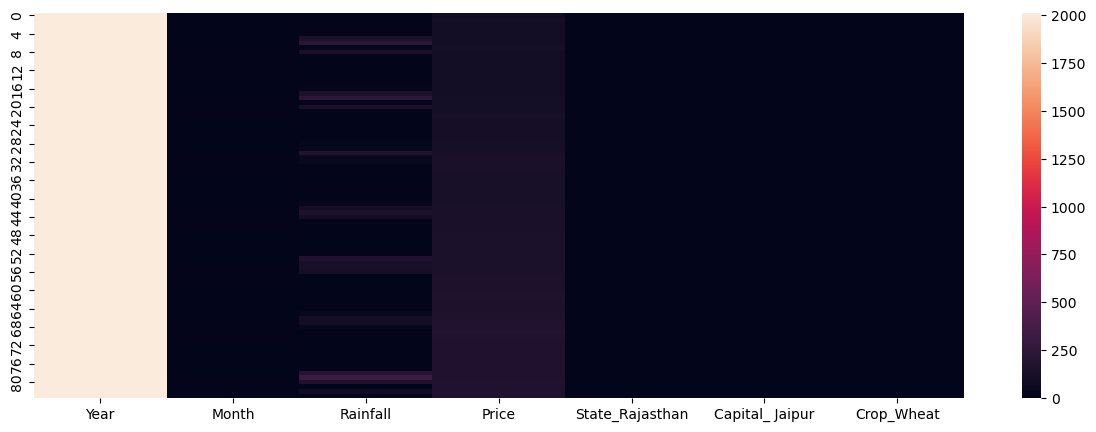

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.heatmap(df_)

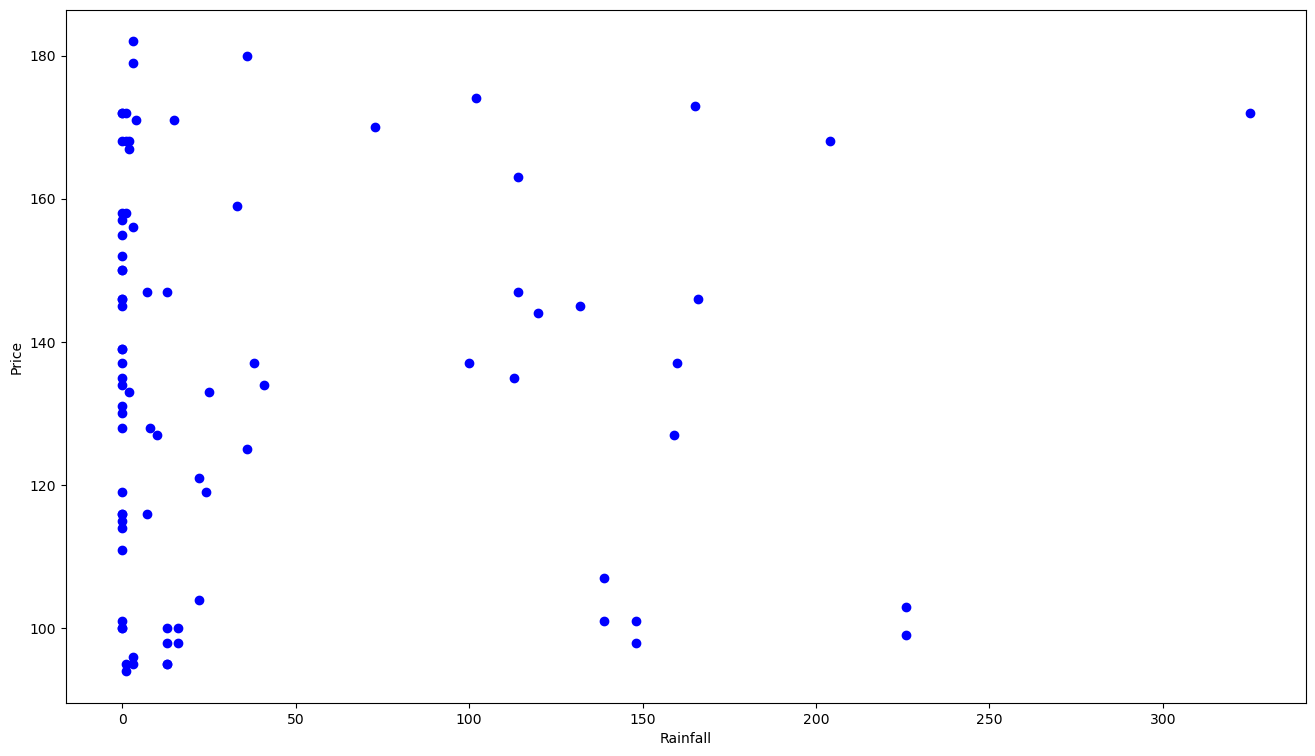

In [67]:
plt.scatter(df_.Rainfall, df_.Price,  color='blue')
plt.xlabel("Rainfall")
plt.ylabel("Price")
plt.show()

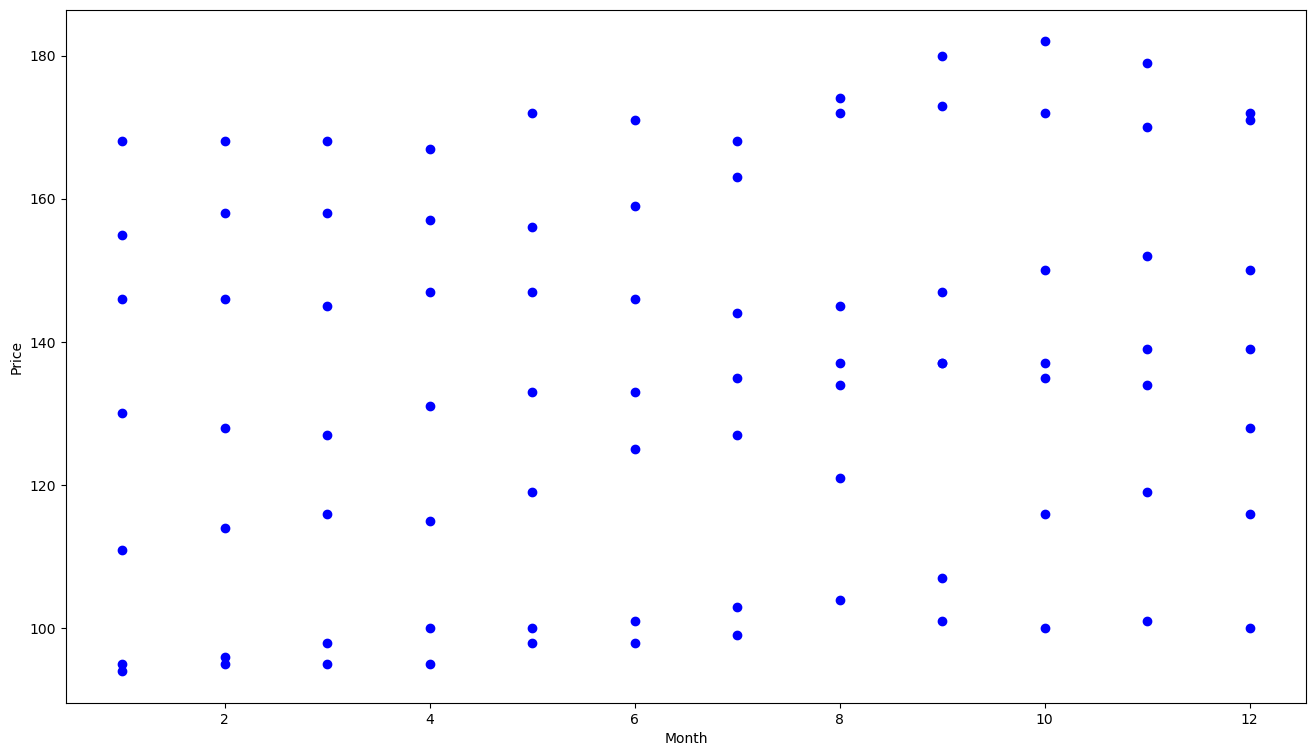

In [68]:
plt.scatter(df_.Month, df_.Price,  color='blue')
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

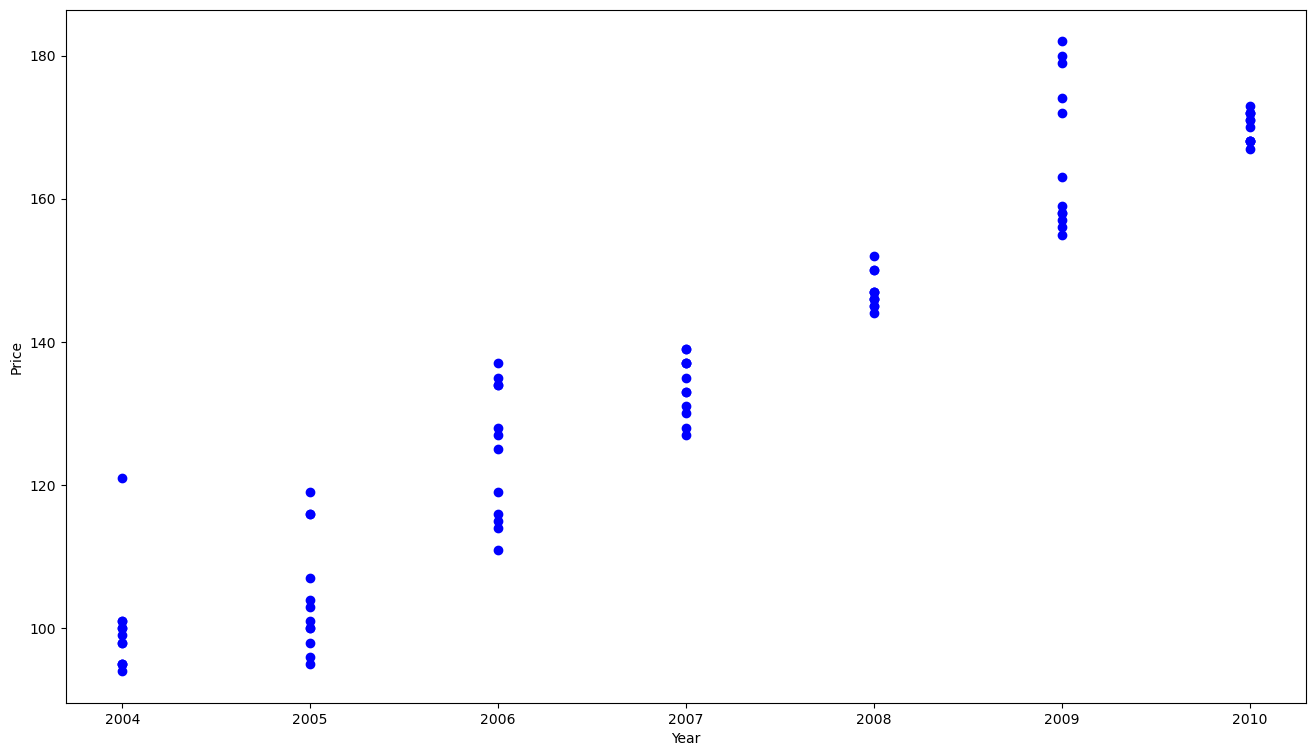

In [69]:
plt.scatter(df_.Year, df_.Price,  color='blue')
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [70]:
print(df_.columns)

Index(['Year', 'Month', 'Rainfall', 'Price', 'State_Rajasthan',
       'Capital_ Jaipur'],
      dtype='object')


In [12]:
df_ = df_.drop(['State_Rajasthan'], axis=1)
y = df_['Price']
df_ = df_.drop(['Price'], axis=1)
df_.describe(include='all')

,Year,Month,Rainfall,Capital_ Jaipur,Crop_Wheat
count,84.000000,84.000000,84.000000,84.0,84.0
mean,2007.000000,6.500000,41.952381,1.0,1.0
std,2.012012,3.472786,69.149725,0.0,0.0
min,2004.000000,1.000000,0.000000,1.0,1.0
25%,2005.000000,3.750000,0.000000,1.0,1.0
50%,2007.000000,6.500000,3.500000,1.0,1.0
75%,2009.000000,9.250000,38.750000,1.0,1.0
max,2010.000000,12.000000,325.000000,1.0,1.0


In [13]:
y.head()

0    94
1    95
2    95
3    95
4    98
Name: Price, dtype: int64

In [14]:
print(df_.columns)

Index(['Year', 'Month', 'Rainfall', 'Capital_ Jaipur', 'Crop_Wheat'], dtype='object')


In [15]:
from sklearn.model_selection import train_test_split

# Assuming 'Price' is the target (y) and the remaining columns are the features (X)
X = df_[['Rainfall', 'Year', 'Month']]  # Select specific features (columns)


# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the shape of the split data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (63, 3)
X_test shape: (21, 3)
y_train shape: (63,)
y_test shape: (21,)


## Linear Regression with Single Variable

In [16]:
# Assuming you want to use the training set for gradient descent:
x = X_train['Rainfall'].values  # Use a specific feature from X_train
y = y_train.values  # Use the corresponding y_train values

# Initialize parameters for gradient descent
iteration = 1000
learning_rate = 0.01
n = len(y)  # Number of training examples
slope = 0
intercept = 0

# Gradient Descent Algorithm
for i in range(iteration):
    # Predict values using current slope and intercept
    y_predicted = slope * x + intercept
    
    # Calculate the gradients (partial derivatives) for slope and intercept
    diff1 = -2 * ((y - y_predicted) * x).sum() / n  # Gradient for slope
    diff2 = -2 * (y - y_predicted).sum() / n        # Gradient for intercept
    
    # Update slope and intercept
    slope = slope - learning_rate * diff1
    intercept = intercept - learning_rate * diff2
    
    # Calculate the cost (Mean Squared Error)
    cost = ((y - y_predicted) ** 2).sum() / n
    
    # Print progress
    print(f"Iteration {i+1}: Slope={slope}, Intercept={intercept}, Cost={cost}")

Iteration 1: Slope=125.71396825396825, Intercept=2.7092063492063496, Cost=19045.015873015873
Iteration 2: Slope=-17617.832333585284, Intercept=-109.33480151171582, Cost=110774236.27719904
Iteration 3: Slope=2486498.7115753056, Intercept=15969.735744272204, Cost=2206053945052.8027
Iteration 4: Slope=-350915457.86360925, Intercept=-2252981.0123253525, Cost=4.393847158028737e+16
Iteration 5: Slope=49524136330.24948, Intercept=317960660.9679253, Cost=8.751324056786637e+20
Iteration 6: Slope=-6989261995634.098, Intercept=-44873277220.37938, Cost=1.7430208651425585e+25
Iteration 7: Slope=986383344854072.1, Intercept=6332893704343.372, Cost=3.471613799932655e+29
Iteration 8: Slope=-1.3920670073795416e+17, Intercept=-893751139760408.6, Cost=6.914491166975867e+33
Iteration 9: Slope=1.9646018590483448e+19, Intercept=1.2613366608013965e+17, Cost=1.3771747335234908e+38
Iteration 10: Slope=-2.7726111200937975e+21, Intercept=-1.7801042159320648e+19, Cost=2.7429498438205423e+42
Iteration 11: Slope=3.

/var/folders/k9/610hmpk11zbdhpvs8bh_6m780000gn/T/ipykernel_9996/2821375099.py:26: RuntimeWarning: overflow encountered in square
  cost = ((y - y_predicted) ** 2).sum() / n
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/k9/610hmpk11zbdhpvs8bh_6m780000gn/T/ipykernel_9996/2821375099.py:15: RuntimeWarning: invalid value encountered in multiply
  y_predicted = slope * x + intercept


**Normalization**

This normalization can make some statistical analyses easier down the road.
By making the ranges consistent between variables,
normalization enables a fair comparison between the different features,
making sure they have the same impact. 

In [17]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame using StandardScaler (assuming df_ only has numerical features)
df_scaled = scaler.fit_transform(df_)

# Convert the result back into a DataFrame
df_scaled = pd.DataFrame(data=df_scaled, columns=df_.columns)

# Display the first few rows of the scaled DataFrame
df_scaled.head()

,Year,Month,Rainfall,Capital_ Jaipur,Crop_Wheat
0,-1.5,-1.593255,-0.595785,0.0,0.0
1,-1.5,-1.303572,-0.566688,0.0,0.0
2,-1.5,-1.013890,-0.421206,0.0,0.0
3,-1.5,-0.724207,-0.421206,0.0,0.0
4,-1.5,-0.434524,-0.377561,0.0,0.0


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train,y_train)
y_predicted=reg.predict(X_test)
r2_score(y_predicted,y_test)

0.9663398152230178

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


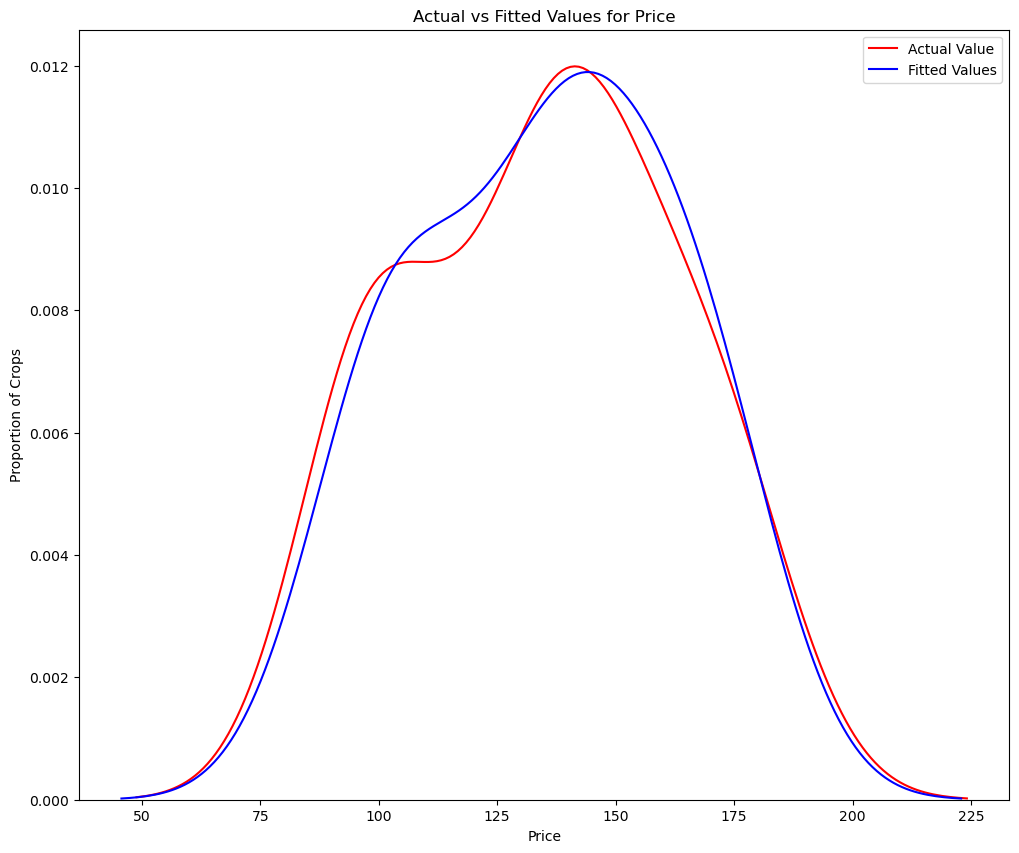

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
width = 12
height = 10
plt.figure(figsize=(width, height))

# Plot the actual values with `kdeplot`
ax1 = sns.kdeplot(y_test, color="r", label="Actual Value", fill=False)

# Plot the predicted values with `kdeplot` on the same axes
sns.kdeplot(y_predicted, color="b", label="Fitted Values", fill=False, ax=ax1)

# Set plot labels and title
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Crops')

# Show the legend and plot
plt.legend()
plt.show()
plt.close()

In [20]:
from sklearn import tree

clf=tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)
x_predicted=clf.predict(X_test)
r2_score(x_predicted,y_test)

0.9736051074017423

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.9778583334890064

In [22]:
from keras.models import Sequential
from keras.layers import Dense

# Create the Sequential model
model = Sequential()

# Add the hidden layer with 2 units (neurons) and input dimension of 5
model.add(Dense(units=2, input_dim=5, activation='relu'))  # Use 'units' instead of 'output_dim'

# Add the output layer with 1 unit (for regression output)
model.add(Dense(units=1, activation='linear'))  # Use 'units' instead of 'output_dim'

# Compile the model with mean absolute error as the loss function and adam optimizer
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Summary of the model
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Create the Sequential model
model = Sequential()

# Add the hidden layer with 2 units and input dimension of 3 (since you have 3 features)
model.add(Dense(units=2, input_dim=3, activation='relu'))

# Add the output layer with 1 unit (for regression output)
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
model_fitted = model.fit(X_train, y_train, batch_size=50, epochs=1000)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 812.2030 - mean_absolute_error: 812.2030  
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 807.8937 - mean_absolute_error: 807.8937
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 802.9648 - mean_absolute_error: 802.9648
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 797.8678 - mean_absolute_error: 797.8678
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 794.3888 - mean_absolute_error: 794.3888
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 788.4437 - mean_absolute_error: 788.4437
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 785.3980 - mean_absolute_error: 785.3980
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 779.6316 - mean_absolute_error: 779.6316
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 775.8098 - mean_absolute_error: 775.8098 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 770.9960 - mean_absolute_error: 770.9960 
Epoch

In [31]:
x_predicted=model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [88]:
# Ensure you provide only 3 features
x = np.array([[2011, 1, 0]])  # Adjust the input to match the model's expected input_dim (3)

# Predict using the model
x_predicted = model.predict(x)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_18" is incompatible with the layer: expected axis -1 of input shape to have value 5, but received input with shape (1, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 3), dtype=int64)
  • training=False
  • mask=None

In [89]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 2)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

NameError: name 'model' is not defined

In [3]:
# Save model weights to a file with the correct extension
model.save_weights("model.weights.h5")

# Print confirmation
print("Model successfully saved")

NameError: name 'model' is not defined

In [2]:
import numpy as np

# Example input: Rainfall=150, Year=2024, Month=9
input_data = np.array([[150, 2024, 9]])

# Predict the price
predicted_price = model.predict(input_data)



NameError: name 'model' is not defined

In [96]:
# Assuming you used StandardScaler or another scaler on the target variable (y)
y_scaler = StandardScaler()  # Or MinMaxScaler

# Fit the scaler on the training target data
y_scaler.fit(y_train.values.reshape(-1, 1))

# Inverse transform the predicted value to get the actual price
predicted_price_original = y_scaler.inverse_transform(predicted_price)

print(f"The actual predicted price is: {predicted_price_original[0][0]}")



The actual predicted price is: 2569.44091796875


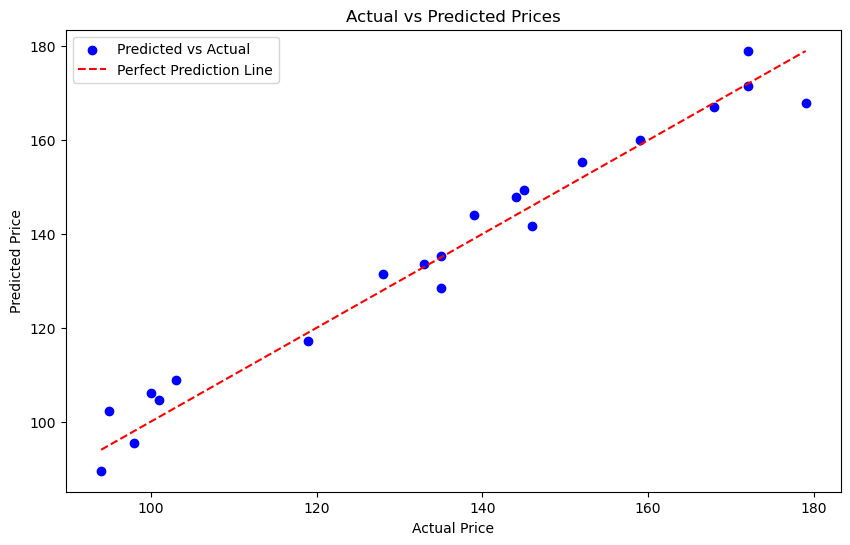

R^2 Score: 0.9682037562512253


In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train a linear regression model (replace this with your actual model)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_predicted = model.predict(X_test)

# Plot the actual values vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of the actual vs predicted prices
plt.scatter(y_test, y_predicted, color='blue', label='Predicted vs Actual')

# Line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.legend()

# Show the plot
plt.show()

# Print R^2 score for evaluation
print(f"R^2 Score: {r2_score(y_test, y_predicted)}")

In [86]:
import tensorflow as tf
import numpy as np

# Convert y_test and y_predicted to NumPy arrays if they aren't already
y_test = np.array(y_test)  # Replace with your actual y_test values
y_predicted = np.array(y_predicted)  # Replace with your actual y_predicted values

# Ensure they have the same shape
print("y_test shape:", y_test.shape)
print("y_predicted shape:", y_predicted.shape)

# Initialize Huber loss function
huber = tf.keras.losses.Huber()

# Compute the Huber loss
loss = huber(y_test, y_predicted).numpy()

# Print the loss value
print(f"Huber loss between y_test and y_predicted: {loss}")

y_test shape: (21,)
y_predicted shape: (21,)
Huber loss between y_test and y_predicted: 3.5221445560455322
